# Question 3

## Libraries

In [17]:
import pandas as pd
import os
import cv2
from tqdm import tqdm_notebook
from scenedetect import VideoManager
from scenedetect import SceneManager
from scenedetect.detectors import ContentDetector
from scenedetect.scene_manager import generate_images
import matplotlib.pyplot as plt
import numpy as np
from scenedetect import VideoManager
from scenedetect import SceneManager

from scenedetect.detectors import ContentDetector
from scenedetect.scene_manager import generate_images

# Import

In [18]:
trailers = pd.read_csv("trailers.csv")
print(len(trailers))
trailers.head()

942


,trailer_title,url,imdb_id,year,rating,votes,genre
0,THE BIG PARADE trailer,https://archive.org/download/TheBigParadeTrail...,15624,1925,7.9,6148.0,Drama|Romance|War
1,ALL QUIET ON THE WESTERN FRONT 1930 trailer,https://archive.org/download/AllQuietOnTheWest...,20629,1930,8.0,56948.0,Drama|War
2,THE OREGON TRAIL trailer,https://archive.org/download/TheOregonTrailTra...,20691,1926,7.2,3353.0,Adventure|Romance|Western
3,FIVE STAR FINAL trailer,https://archive.org/download/FiveStarFinalTrai...,21873,1931,7.2,1790.0,Crime|Drama
4,LITTLE CAESAR trailer,https://archive.org/download/LittleCaesarTrail...,21079,1931,7.3,11958.0,Action|Crime|Drama|Romance


# Answer

In [19]:
l_20_40 = list(range(1920,1940))
l_60_80 = list(range(1960,1980))
l_00_20 = list(range(2000,2020))

In [20]:
t_20_40 = trailers[trailers["year"].isin(l_20_40)]
t_60_80 = trailers[trailers["year"].isin(l_60_80)]
t_00_20 = trailers[trailers["year"].isin(l_00_20)]

In [21]:
t_20_40_sample = t_20_40.sample(10, random_state=8).reset_index(drop=True)
t_60_80_sample = t_60_80.sample(10, random_state=8).reset_index(drop=True)
t_00_20_sample = t_00_20.sample(10, random_state=8).reset_index(drop=True)

t_samples = pd.concat([t_20_40_sample, t_60_80_sample, t_00_20_sample])
print(len(t_samples))
t_samples.head()

30


,trailer_title,url,imdb_id,year,rating,votes,genre
0,DINNER AT EIGHT trailer,https://archive.org/download/DinnerAtEightTrai...,23948,1933,7.5,7536.0,Comedy|Drama
1,FOOTLIGHT PARADE trailer,https://archive.org/download/FootlightParadeTr...,24028,1933,7.5,4832.0,Comedy|Musical|Romance
2,ALL QUIET ON THE WESTERN FRONT 1930 trailer,https://archive.org/download/AllQuietOnTheWest...,20629,1930,8.0,56948.0,Drama|War
3,SATAN MET A LADY trailer,https://archive.org/download/SatanMetALadyTrai...,28219,1936,6.0,1894.0,Comedy|Crime|Mystery
4,THE GOOD EARTH trailer,https://archive.org/download/TheGoodEarthTrail...,28944,1937,7.5,4474.0,Drama|Romance


FIRST DOWNLOAD ALL SAMPLED TRAILERS

In [22]:
 for i in range(len(t_samples)):
    tr = t_samples.iloc[i]
    print(tr["trailer_title"])
   
    tr_url = tr["url"]
    tr_file = tr_url.split("/")[-1]
    if not os.path.isfile(tr_file):
        os.system("wget " + tr_url)

DINNER AT EIGHT trailer
FOOTLIGHT PARADE trailer
ALL QUIET ON THE WESTERN FRONT 1930 trailer
SATAN MET A LADY trailer
THE GOOD EARTH trailer
THE YOUNG IN HEART trailer
AT THE CIRCUS trailer
THE GAY DIVORCEE trailer
TEST PILOT trailer
BONNIE SCOTLAND trailer
LET'S MAKE LOVE trailer
55 DAYS AT PEKING trailer
THE CRAWLING HAND trailer 2
THE ROSE trailer
GENGHIS KHAN trailer
MATANGO trailer
BOCCACCIO '70 trailer
COCO BEFORE CHANEL full trailer
HIGH ANXIETY trailer
OUR MAN FLINT trailer
HARDWIRED trailer
MR & MRS SMITH 2005 trailer
THE MESSENGER trailers
THE TRIPLETS OF BELLEVILLE trailer
KATE & LEOPOLD trailer
BEYOND THE TIME BARRIER trailer 2
DID YOU HEAR ABOUT THE MORGANS? trailer
THE SECRET IN THEIR EYES trailer
CHRISTMAS WITH THE KRANKS trailer
KUNG FU PANDA 2 dvd trailer


# LOOP

In [23]:
def find_scenes(video_path, threshold=30.0):
    video_manager = VideoManager([video_path])
    scene_manager = SceneManager()
    scene_manager.add_detector(
        ContentDetector(threshold=threshold))
    base_timecode = video_manager.get_base_timecode()
    video_manager.set_downscale_factor()
    video_manager.start()
    scene_manager.detect_scenes(frame_source=video_manager, show_progress=False)    
    return scene_manager.get_scene_list(base_timecode)

face_classification = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # load the classifier only once!

emotion_classifier = load_model('fer2013_mini_XCEPTION.102-0.66.hdf5') # load this only once! (not in a loop)
EMOTION_OFFSETS = (0, 0)
INPUT_SHAPE_EMOTION = emotion_classifier.input_shape[1:3]
labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

NameError: name 'load_model' is not defined

In [130]:
trailer_faces = pd.DataFrame()
trailer_emotions = pd.DataFrame()

In [131]:
# for i in range(len(t_samples)):
#     # get trailer
#     tr = t_samples.iloc[i]
#     tr_url = tr["url"]
#     tr_file = tr_url.split("/")[-1]
#     if os.path.isfile(str(tr_file)):
#         print (str(tr_file))
#     else:
#         print(f"error with {tr_file}")
    
#     # get frames
#     filename = tr_file
#     if filename not in trailer_faces.index:
#         cap = cv2.VideoCapture(filename)
#         frames = []
#         scene_list = find_scenes(filename, threshold=15)
#         for start_time, end_time in scene_list:
#             duration = end_time - start_time
#             frame = (start_time.get_frames() + int(duration.get_frames() / 2))
#             cap.set(cv2.CAP_PROP_POS_FRAMES,frame)
#             ret, frame = cap.read()
#             frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#             frames.append(frame)

#         # get amount of faces in frame
#         frame_faces = []
#         emotions_probas = []
#         for frame in frames:
#             gray_image = frame
#             faces = face_classification.detectMultiScale(gray_image, 1.3, 5) # detect the faces 
#             n_faces = len(faces) # get the number of faces
#             frame_faces.append(n_faces)
#             # for each frame with faces, I want to get the emotions
#             if n_faces > 0:
#                 for face_coordinates in faces:
#                     x1, x2, y1, y2 = apply_offsets(face_coordinates, EMOTION_OFFSETS) 
#                     face_img = gray_image[y1:y2, x1:x2] # only get the face
#                     face_img = cv2.resize(face_img, (INPUT_SHAPE_EMOTION))
#                     face_img = face_img.astype('float32') / 255.0 # pre-processing 
#                     face_img = face_img - 0.5 # pre-processing specific to the emotion classifier
#                     face_img = face_img * 2.0 # pre-processing specific to the emotion classifier
#                     face_img = np.expand_dims(face_img, 0) # batch of one
#                     face_img = np.expand_dims(face_img, -1) # pre-processing specific to the emotion classifier
#                     probas = emotion_classifier.predict(face_img).squeeze()
#                     # add emotions of all faces to a list
#                     emotions_probas.append(probas)
#         face_described = pd.DataFrame(frame_faces).describe()
#         face_described_t = face_described.transpose()
#         face_described_t.columns = [f"faces_in_frame_{desc}" for desc in face_described_t.columns]
#         face_described_t.index = [str(tr_file)]
#         trailer_faces = pd.concat([trailer_faces, face_described.transpose()])
        
#         # make a df from probabilities
#         emotions_probas_df = pd.DataFrame(emotions_probas, columns = labels)
#         described_emotions = pd.DataFrame()
#         for label in labels:
#             described_emotion = pd.DataFrame(emotions_probas_df[label].describe())
#             described_emotion_t = described_emotion.transpose()
#             described_emotion_t.columns = [f"{label}_{desc}" for desc in described_emotion_t.columns]
#             described_emotions = pd.concat([described_emotions, described_emotion_t.reset_index(drop=True)], axis=1)
#         described_emotions.index = [filename]
#         trailer_emotions = pd.concat([trailer_emotions, described_emotions])

DinnerAtEightTrailer.mp4
FootlightParadeTrailer.mp4
AllQuietOnTheWesternFront1930Trailer.mp4
SatanMetALadyTrailer.mp4
TheGoodEarthTrailer.mp4
TheYoungInHeartTrailer.mp4
AtTheCircusTrailer.mp4
TheGayDivorceeTrailer.mp4
TestPilotTrailer.mp4
BonnieScotlandTrailer.mp4
LetsMakeLoveTrailer.mp4
55DaysAtPekingTrailer.mp4
TheCrawlingHandTrailer2.mp4
TheRoseTrailer.mp4
GenghisKhanTrailer.mp4
MatangoTrailer.mp4
Boccaccio70Trailer.mp4
CocoBeforeChanelFullTrailer.mp4
HighAnxietyTrailer.mp4
OurManFlintTrailer.mp4
HardwiredTrailer.mp4
MrMrsSmith2005Trailer.mp4
TheMessengerTrailer1.mp4
TheTripletsOfBellviewTrailer.mp4
KateLeopoldTrailer.mp4
BeyondTheTimeBarrierTrailer2.mp4
DidYouHearAboutTheMorgansTrailer.mp4
TheSecretInTheirEyesTrailer.mp4
ChristmasWithTheKranksTrailer.mp4
KungFuPanda2DvdTrailer.mp4


In [126]:
trailer_faces

,count,mean,std,min,25%,50%,75%,max
DinnerAtEightTrailer.mp4,10.0,0.40,0.699206,0.0,0.0,0.0,0.75,2.0
FootlightParadeTrailer.mp4,20.0,0.45,0.686333,0.0,0.0,0.0,1.00,2.0


In [ ]:
'angry_count', 'angry_mean', 'angry_std', 'angry_min', 'angry_25%','angry_50%', 'angry_75%', 'angry_max', 'disgust_count', 'disgust_mean', 'disgust_std', 'disgust_min', 'disgust_25%', 'disgust_50%', 'disgust_75%', 'disgust_max', 'fear_count', 'fear_mean', 'fear_std',
'fear_min', 'fear_25%', 'fear_50%', 'fear_75%', 'fear_max', 'happy_count', 'happy_mean', 'happy_std', 'happy_min', 'happy_25%', 'happy_50%', 'happy_75%', 'happy_max', 'sad_count', 'sad_mean',
       'sad_std', 'sad_min', 'sad_25%', 'sad_50%', 'sad_75%', 'sad_max',
       'surprise_count', 'surprise_mean', 'surprise_std', 'surprise_min',
       'surprise_25%', 'surprise_50%', 'surprise_75%', 'surprise_max',
       'neutral_count', 'neutral_mean', 'neutral_std', 'neutral_min',
       'neutral_25%', 'neutral_50%', 'neutral_75%', 'neutral_max'

In [138]:
trailer_emotions.columns[0:56]

Index(['angry_count', 'angry_mean', 'angry_std', 'angry_min', 'angry_25%',
       'angry_50%', 'angry_75%', 'angry_max', 'disgust_count', 'disgust_mean',
       'disgust_std', 'disgust_min', 'disgust_25%', 'disgust_50%',
       'disgust_75%', 'disgust_max', 'fear_count', 'fear_mean', 'fear_std',
       'fear_min', 'fear_25%', 'fear_50%', 'fear_75%', 'fear_max',
       'happy_count', 'happy_mean', 'happy_std', 'happy_min', 'happy_25%',
       'happy_50%', 'happy_75%', 'happy_max', 'sad_count', 'sad_mean',
       'sad_std', 'sad_min', 'sad_25%', 'sad_50%', 'sad_75%', 'sad_max',
       'surprise_count', 'surprise_mean', 'surprise_std', 'surprise_min',
       'surprise_25%', 'surprise_50%', 'surprise_75%', 'surprise_max',
       'neutral_count', 'neutral_mean', 'neutral_std', 'neutral_min',
       'neutral_25%', 'neutral_50%', 'neutral_75%', 'neutral_max'],
      dtype='object')

In [106]:
filename in trailer_faces.index

True

In [110]:
trailer_faces.index = ["a", "b", "c"]
trailer_faces

,count,mean,std,min,25%,50%,75%,max
a,10.0,0.40,0.699206,0.0,0.0,0.0,0.75,2.0
b,10.0,0.40,0.699206,0.0,0.0,0.0,0.75,2.0
c,20.0,0.45,0.686333,0.0,0.0,0.0,1.00,2.0


In [111]:
trailer_emotions.index = trailer_faces.index
trailer_emotions

,angry_count,angry_mean,angry_std,angry_min,angry_25%,angry_50%,angry_75%,angry_max,disgust_count,disgust_mean,...,surprise_75%,surprise_max,neutral_count,neutral_mean,neutral_std,neutral_min,neutral_25%,neutral_50%,neutral_75%,neutral_max
a,4.0,0.359922,0.366345,0.035736,0.166218,0.260920,0.454624,0.882112,4.0,0.005270,...,0.003082,0.008306,4.0,0.242066,0.335229,0.001963,0.036796,0.117705,0.322974,0.730891
b,4.0,0.359922,0.366345,0.035736,0.166218,0.260920,0.454624,0.882112,4.0,0.005270,...,0.003082,0.008306,4.0,0.242066,0.335229,0.001963,0.036796,0.117705,0.322974,0.730891
c,9.0,0.125044,0.095297,0.012480,0.058350,0.120425,0.133728,0.330355,9.0,0.015138,...,0.052133,0.120074,9.0,0.235089,0.215282,0.079644,0.096945,0.108153,0.375910,0.695363


In [104]:
trailer_emotions.index

Int64Index([0, 0, 0], dtype='int64')

In [96]:
described_emotion_t

count    4.000000
mean     0.359922
std      0.366345
min      0.035736
25%      0.166218
50%      0.260920
75%      0.454624
max      0.882112
Name: angry, dtype: float64

In [23]:
transposed = trailer_faces.transpose().reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,DinnerAtEightTrailer.mp4,10.0,0.400000,0.699206,0.0,0.0,0.0,0.75,2.0
1,FootlightParadeTrailer.mp4,20.0,0.450000,0.686333,0.0,0.0,0.0,1.00,2.0
2,AllQuietOnTheWesternFront1930Trailer.mp4,98.0,0.275510,0.588211,0.0,0.0,0.0,0.00,3.0
3,SatanMetALadyTrailer.mp4,14.0,0.357143,0.497245,0.0,0.0,0.0,1.00,1.0
4,TheGoodEarthTrailer.mp4,8.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
5,TheYoungInHeartTrailer.mp4,7.0,0.428571,0.534522,0.0,0.0,0.0,1.00,1.0
6,AtTheCircusTrailer.mp4,6.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
7,TheGayDivorceeTrailer.mp4,20.0,0.250000,0.444262,0.0,0.0,0.0,0.25,1.0
8,TestPilotTrailer.mp4,34.0,0.147059,0.500445,0.0,0.0,0.0,0.00,2.0
9,BonnieScotlandTrailer.mp4,5.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0


In [26]:
filename = "Boccaccio70Trailer.mp4"
cap = cv2.VideoCapture(filename)

frames = []
shot_length = []

for start_time, end_time in scene_list:
    duration = end_time - start_time
    frame = (start_time.get_frames() + int(duration.get_frames() / 2))
    cap.set(cv2.CAP_PROP_POS_FRAMES,frame)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)
    shot_length.append(duration.get_seconds())

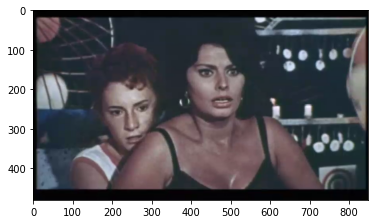

In [32]:
i = 11
ex = frames[i]
plt.imshow(ex)

In [33]:
ex.shape

(480, 848, 3)

In [34]:
type(ex)

numpy.ndarray

In [35]:
gray_image = cv2.cvtColor(ex, cv2.COLOR_RGB2GRAY)

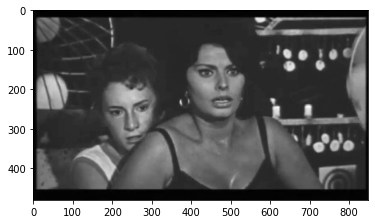

In [36]:
plt.imshow(gray_image, cmap="gray")

In [37]:
face_classification = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # load the classifier only once!

faces = face_classification.detectMultiScale(gray_image, 1.3, 5) # detect the faces 
n_faces = len(faces) # get the number of faces
print('Detected {} face(s)!'.format(n_faces))

Detected 2 face(s)!


In [38]:
for (x, y, w, h) in faces:
    print(x, y, w, h)

394 91 167 167
170 193 150 150


In [39]:
tot = gray_image.shape[0]*gray_image.shape[1]

In [40]:
face = h*h

In [41]:
face/tot

0.055277122641509434

In [42]:
from tensorflow.keras.models import load_model

def apply_offsets(face_coordinates, offsets):
    """
    Derived from https://github.com/oarriaga/face_classification/blob/
    b861d21b0e76ca5514cdeb5b56a689b7318584f4/src/utils/inference.py#L21
    """
    x, y, width, height = face_coordinates
    x_off, y_off = offsets
    return (x - x_off, x + width + x_off, y - y_off, y + height + y_off)

gender_classifier = load_model('gender_mini_XCEPTION.21-0.95.hdf5') # load this only once! (not in a loop)

GENDER_OFFSETS = (10, 10)
INPUT_SHAPE_GENDER = gender_classifier.input_shape[1:3]

labels = ['woman', 'man']

for face_coordinates in faces: # using the output of the CascadeClassifier
    x1, x2, y1, y2 = apply_offsets(face_coordinates, GENDER_OFFSETS) # extends the bounding box
    face_img = gray_image[y1:y2, x1:x2] # only get the face 
    face_img = cv2.resize(face_img, (INPUT_SHAPE_GENDER)) # resize the image
    face_img = face_img.astype('float32') / 255.0 # preprocess the image
    face_img = np.expand_dims(face_img, 0) # batch of one
    probas = gender_classifier.predict(face_img) 
    print(labels[np.argmax(probas[0])], probas[0][np.argmax(probas[0])]) # print the class and the probabilitys

woman 0.69595027
woman 0.6035089


In [43]:
emotion_classifier = load_model('fer2013_mini_XCEPTION.102-0.66.hdf5') # load this only once! (not in a loop)

EMOTION_OFFSETS = (0, 0)
INPUT_SHAPE_EMOTION = emotion_classifier.input_shape[1:3]

labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for face_coordinates in faces:
    x1, x2, y1, y2 = apply_offsets(face_coordinates, EMOTION_OFFSETS) 
    face_img = gray_image[y1:y2, x1:x2] # only get the face
    face_img = cv2.resize(face_img, (INPUT_SHAPE_EMOTION))
    face_img = face_img.astype('float32') / 255.0 # pre-processing 
    face_img = face_img - 0.5 # pre-processing specific to the emotion classifier
    face_img = face_img * 2.0 # pre-processing specific to the emotion classifier
    face_img = np.expand_dims(face_img, 0) # batch of one
    face_img = np.expand_dims(face_img, -1) # pre-processing specific to the emotion classifier
    probas = emotion_classifier.predict(face_img)
    label = labels[np.argmax(probas[0])]
    emotionprobas = dict(zip(labels, probas[0])) # make a dictionary from the labels and the probabilities
    print('This person looks {}'.format(label))
    print(emotionprobas)

This person looks surprise
{'angry': 0.0126372455, 'disgust': 8.32343e-05, 'fear': 0.10556537, 'happy': 0.0056242156, 'sad': 0.035209082, 'surprise': 0.58016217, 'neutral': 0.26071864}
This person looks sad
{'angry': 0.05362286, 'disgust': 0.0002209592, 'fear': 0.40849715, 'happy': 0.00024245368, 'sad': 0.43577474, 'surprise': 0.0036720082, 'neutral': 0.09796981}


In [47]:
probas.squeeze().shape

(7,)

In [51]:
emotionss = pd.DataFrame([probas.squeeze(), probas.squeeze()], columns = labels)
emotionss

,angry,disgust,fear,happy,sad,surprise,neutral
0,0.053623,0.000221,0.408497,0.000242,0.435775,0.003672,0.09797
1,0.053623,0.000221,0.408497,0.000242,0.435775,0.003672,0.09797


In [63]:

for emotion in emotionss.columns:
    print(emotion)
    emotion_temp = pd.DataFrame(emotionss[emotion].describe())
    emotion_temp

angry
disgust
fear
happy
sad
surprise
neutral


In [69]:
transpose = emotion_temp.transpose()
transpose.columns = [f"{emotion}_{desc}" for desc in transpose.columns]
transpose

,neutral_count,neutral_mean,neutral_std,neutral_min,neutral_25%,neutral_50%,neutral_75%,neutral_max
neutral,2.0,0.09797,0.0,0.09797,0.09797,0.09797,0.09797,0.09797


In [85]:
test = pd.DataFrame()

In [87]:

test = pd.concat([test, transpose.reset_index(drop=True)], axis=1)
test

,neutral_count,neutral_mean,neutral_std,neutral_min,neutral_25%,neutral_50%,neutral_75%,neutral_max,neutral_count,neutral_mean,neutral_std,neutral_min,neutral_25%,neutral_50%,neutral_75%,neutral_max
0,2.0,0.09797,0.0,0.09797,0.09797,0.09797,0.09797,0.09797,2.0,0.09797,0.0,0.09797,0.09797,0.09797,0.09797,0.09797


In [65]:
pd.concat([emotion_temp, emotion_temp])

,neutral
count,2.00000
mean,0.09797
std,0.00000
min,0.09797
25%,0.09797
50%,0.09797
75%,0.09797
max,0.09797
count,2.00000
mean,0.09797


In [127]:
face_classification = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # load the classifier only once!

trailer_faces = pd.DataFrame()
frame_faces = []
for frame in frames:
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classification.detectMultiScale(gray_image, 1.3, 5) # detect the faces 
    n_faces = len(faces) # get the number of faces
    frame_faces.append(n_faces)
    mean_faces = np.mean(frame_faces)
    mean_np.std(frame_faces)
    described = pd.DataFrame(frame_faces).describe()
    trailer_faces = pd.concat([trailer_faces, described], axis=1)

In [149]:
described = pd.DataFrame(frame_faces).describe()
described

,0
count,164.000000
mean,0.378049
std,0.745378
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,5.000000


In [140]:
trailer_faces = pd.DataFrame()
trailer_faces

""


In [152]:
pd.concat([described, described], axis=1)

,0,0
count,164.000000,164.000000
mean,0.378049,0.378049
std,0.745378,0.745378
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,5.000000,5.000000


In [ ]:
for i in 